In [2]:
import pandas as pd
data_frame_Arrests_under_crime_against_women = pd.read_csv("Arrests_under_crime_against_women.csv")
data_frame_Arrests_under_crime_against_women.head()
data_frame_Arrests_under_crime_against_women.drop(labels="Group_Name", axis='columns', inplace=True)
print(data_frame_Arrests_under_crime_against_women.shape)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data_frame_Arrests_under_crime_against_women, test_size=0.25, random_state=94)
print("Train set no. of rows and columns ",train_set.shape)
print("Test set no. of rows and columns ",test_set.shape)


(4165, 15)
Train set no. of rows and columns  (3123, 15)
Test set no. of rows and columns  (1042, 15)


### Features for X and Y

I have choosen years as initial set of features for X, the Persons_Arrested is a target feature for y  to know the how many people are reported in past years and it will help to predict the crime rate in the feature


In [5]:
data_frame_Arrests_under_crime_against_women.head()

,Area_Name,Year,Sub_Group_Name,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_end,Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End,Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason,Persons_Trial_Completed,Persons_under_Trial_at_Year_beginning,Total_Persons_under_Trial
0,Andaman & Nicobar Islands,2001,01. Rape,6,0,3,3,0,6,6,45,0,6,48,51
1,Andhra Pradesh,2001,01. Rape,1168,13,1150,1021,246,450,545,2191,34,1414,2597,3618
2,Arunachal Pradesh,2001,01. Rape,1,0,51,31,2,25,30,347,15,3,319,350
3,Assam,2001,01. Rape,403,14,928,585,120,806,959,2331,190,523,2283,2868
4,Bihar,2001,01. Rape,756,0,1400,1302,217,719,576,5963,241,973,5634,6936


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
0.0008469023989224889
mean squared error is  19415495.186320525
The root mean squared error is  4406.301758427415
The feature coefficients are  [44.42256531]


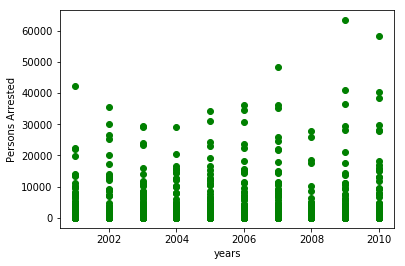

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
reg = LinearRegression()
X = train_set[["Year"]]
Y = train_set["Persons_Arrested"]
print(reg.fit(X, Y))

#Finding R2 value using score method
print(reg.score(X,Y))

y_pred = reg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("mean squared error is ",  mse)
rmse = sqrt(mse)
print("The root mean squared error is ", rmse)

print("The feature coefficients are ", reg.coef_)

import matplotlib.pyplot as plt
plt.scatter(x = X, y = Y,marker="o", c="green")
plt.xlabel("years")
plt.ylabel("Persons Arrested")
plt.savefig("figure.png")
plt.show()

R2 determines that 0% of the predicted value is determined from input. It gives us percentage variation on input.


In [30]:
reg_plus_quad = LinearRegression()
X = train_set[["Year","Persons_Acquitted","Persons_against_whom_cases_Compounded_or_Withdrawn","Persons_Arrested","Persons_Chargesheeted","Persons_Convicted","Persons_Trial_Completed"]]
Y = train_set["Total_Persons_under_Trial"]
reg_plus_quad.fit(X,Y)
print("R2 is : ",reg_plus_quad.score(X,Y))

from sklearn.preprocessing import PolynomialFeatures
create_quad_terms = PolynomialFeatures(degree=3, include_bias=False)
X_quad_terms = create_quad_terms.fit_transform(X)
reg_plus_quad.fit(X_quad_terms, Y)

print("R2 is :",reg_plus_quad.score(X_quad_terms,Y))
print("The Feature Coefficients: ", reg.coef_)

R2 is :  0.9196514482494539
R2 is : 0.9883361235365299
The Feature Coefficients:  [70.09783307  0.4768046  -8.03036177 -1.68144838  7.46548339 -4.56102542
  0.92913015]


In [28]:
from math import sqrt
reg = LinearRegression()
X = train_set[["Year","Persons_Acquitted","Persons_against_whom_cases_Compounded_or_Withdrawn","Persons_Arrested","Persons_Chargesheeted","Persons_Convicted","Persons_Trial_Completed"]]
Y = train_set["Total_Persons_under_Trial"]
print(reg.fit(X, Y))

#Finding r2 value using score method
print(reg.score(X,Y))

y_pred = reg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("Mean Squared Error: ",  mse)
rmse = sqrt(mse)
print("The Root Mean Squared Error: ", rmse)
print("The Feature Coefficients: ", reg.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
0.9196514482494539
Mean Squared Error:  34470015.01920974
The Root Mean Squared Error:  5871.117016310418
The Feature Coefficients:  [70.09783307  0.4768046  -8.03036177 -1.68144838  7.46548339 -4.56102542
  0.92913015]


When I use multiple attributes as initial set of attributes R2 determines maximum percentage  of the predicted values are input.
